# Feature Transformation

## Part B: LDA on Iris Dataset

Apply LDA Algorithm on Iris Dataset and classify which species a given flower belongs to

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

https://www.kaggle.com/datasets/uciml/iris

In [2]:
# Load Iris dataset
iris = pd.read_csv("Iris.csv")

In [3]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
# Drop ID column
iris = iris.drop("Id", axis=1)

In [5]:
# Features and target
X = iris.drop("Species", axis=1)
y = iris["Species"]

In [6]:
# Convert species labels to numbers
y = y.astype("category").cat.codes   # setosa=0, versicolor=1, virginica=2

In [7]:
# Apply LDA (reduce to 2D for visualization)
lda = LDA(n_components=2)
X_lda = lda.fit_transform(X, y)

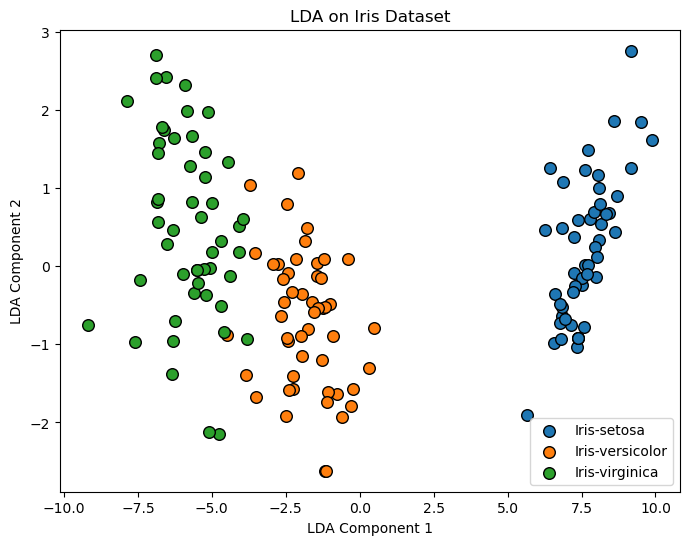

In [8]:
# Visualization
plt.figure(figsize=(8,6))
for label, species in enumerate(iris["Species"].unique()):
    plt.scatter(X_lda[y == label, 0], X_lda[y == label, 1], label=species, s=70, edgecolor="k")
plt.xlabel("LDA Component 1")
plt.ylabel("LDA Component 2")
plt.title("LDA on Iris Dataset")
plt.legend()
plt.show()

In [9]:
# Train-test split for classification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Fit LDA classifier
lda_clf = LDA()
lda_clf.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [11]:
# Predictions
y_pred = lda_clf.predict(X_test)

In [12]:
# Accuracy
print("Classification Accuracy:", accuracy_score(y_test, y_pred))

Classification Accuracy: 1.0


In [13]:
# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [14]:
# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Setosa", "Versicolor", "Virginica"]))


Classification Report:
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        10
  Versicolor       1.00      1.00      1.00         9
   Virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [15]:
def classify_flower(sepal_length, sepal_width, petal_length, petal_width):
    sample = pd.DataFrame([[sepal_length, sepal_width, petal_length, petal_width]],
                          columns=["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"])
    
    prediction = lda_clf.predict(sample)[0]
    species = {0: "Setosa", 1: "Versicolor", 2: "Virginica"}
    return species[prediction]

# Example usage:
print("Predicted Species:", classify_flower(5.1, 3.5, 1.4, 0.2))


Predicted Species: Setosa
